# **Learning to See Programming Challenge Instructions**

![](graphics/finger_counting_demo.gif)

## The Challenge and Data

Your mission is to write a computer vision algorithm to count the number fingers in an image from a [Leap Motion](https://www.leapmotion.com/) Infrared Camera. In this repository you'll find a pickle file containing 42 training examples.

In [1]:
%pylab inline
import pickle
import sys

sys.path.append('../util')
from data_handling import extractFeatures
from image import makeGrayScale

Populating the interactive namespace from numpy and matplotlib


In [2]:
#Load data:
with open('data/training_data.p', 'rb') as f:
    d = pickle.load(f)

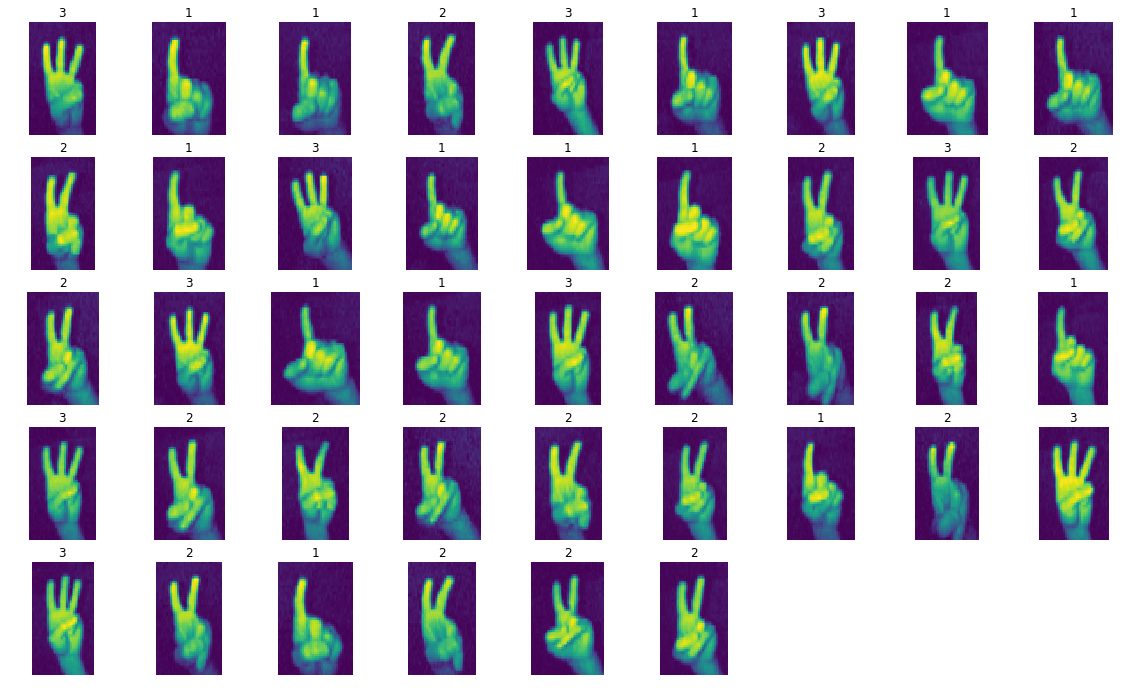

In [3]:
fig = figure(0, (20, 12))

for i in range(len(d)):
    fig.add_subplot(5, 9, i+1)
    
    cropped_image = d[i]['image'][d[i]['boxEdges'][2]:d[i]['boxEdges'][3], \
                                       d[i]['boxEdges'][0]:d[i]['boxEdges'][1]] 
    
    imshow(cropped_image)
    title(str(d[i]['numFingers']))
    axis('off')

## **The Data**

In addition to images and labels, the dataset also includes some other helpful information.

In [4]:
#Data is stored as a list of dicts:
len(d)

42

In [5]:
d[0].keys()

dict_keys(['box', 'middleFingerPoints', 'handPoints', 'trackingIndices', 'allFingerPoints', 'boxWidth', 'image', 'boxEdges', 'croppedImage', 'numFingers', 'numPointsInBox', 'handEdges', 'indexFingerPoints', 'picCount', 'image1bit', 'ringFingerPoints', 'boxHeight'])

Perhaps the most helpful infomration is finger pixel labels:

In [6]:
exampleIndices = [7, 30, 38]

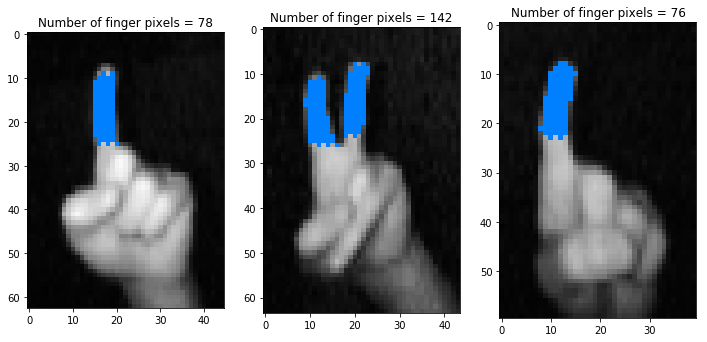

In [7]:
fig = figure(0, (12, 6))

for i in range(3):
    fig.add_subplot(1,3,i+1)
    imageDict = d[exampleIndices[i]]
    
    X1, y1 = extractFeatures(imageDict, whichImage = 'image1bit', dist = 4)    
    yImage = y1.reshape(imageDict['boxHeight'], imageDict['boxWidth'])
    
    im = makeGrayScale(imageDict)
    
    #Paint with matches:
    im[:,:,0][yImage==1] = 0
    im[:,:,1][yImage==1] = .5
    im[:,:,2][yImage==1] = 1
    
    imshow(im, interpolation = 'none')
    title('Number of finger pixels = ' + str(sum(y1==1)))

As you'll see in this series, these labels can be used to train a finger pixel classifier.

## **Evaluation**

Checkout `sample_student.py` for an example submission script. Your submission will be evaluated with `evaluate.py` on a held-out testing set.

In [8]:
from evaluate import evaluate

In [9]:
accuracy, confustion_matrix = evaluate(student_file = 'sample_student', data_file = 'data/training_data.p')

                  Correct Labels  
                  1      2      3
                 -----------------
Predicted     1 | 4      4      6      
Labels        2 | 7      2      9      
              3 | 5      2      3      


Accuracy = 0.214


## **Grading**

This assignment is worth a maxiumum of 10 points.

---


| Accuracy | Points |
| ------------- |:-------------:| 
| >= 0.8         | 10 | 
| 0.7 <= a < 0.8  | 9/10|  
| 0.6 <= a < 0.7 | 8/10 |   
| 0.5 <= a < 0.6 | 7/10 | 
| 0.4 <= a < 0.5 | 6/10 | 
| 0.35 <= a < 0.4 | 5/10 | 
| a < 0.35 | 4/10 |
| Non-running code | 0/10|

# **Good Luck!**